In [130]:
%matplotlib inline
import data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [131]:
idd, seq = data.readseq('train.csv')

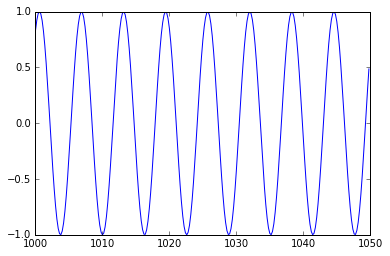

In [132]:
x = np.arange(1000, 1050, step=0.2)
y = np.sin(x)
plt.plot(x, y)
plt.show()

In [133]:
def get_batch(s, ix):
    t = s[ix]
    return t[:-1], t[1:]
def sine_data(ix,size=50):
    x = np.arange(ix, ix + size, step = 0.2)
    y = np.sin(x)
    return y[:-1], y[1:]

In [134]:
inp_out_size = 1
hidden_layer_size = 5
lr = 0.001
epoch = 5000
print_step = 200
num_steps = 15

In [135]:
tf.reset_default_graph()
Wxh = tf.Variable(tf.random_uniform([inp_out_size, hidden_layer_size], maxval=0.01, minval=-0.01), dtype=tf.float32)
Whh = tf.Variable(tf.random_uniform([hidden_layer_size, hidden_layer_size], minval=-0.01, maxval=0.01), dtype=tf.float32)
Why = tf.Variable(tf.random_uniform([hidden_layer_size, inp_out_size], minval=-0.01, maxval=0.01), dtype=tf.float32)

In [136]:
def recurrence(prev, inp):
    i = tf.reshape(inp, shape=[1, -1])
    p = tf.reshape(prev, shape=[1, -1])
    h = tf.nn.tanh(tf.matmul(i, Wxh) + tf.matmul(p, Whh))
    return tf.reshape(h, [hidden_layer_size])

In [137]:
# model
inputs = tf.placeholder(shape=[None, 1], dtype=tf.float32)
targets = tf.placeholder(shape=[None, 1], dtype=tf.float32)
initial = tf.placeholder(shape=[hidden_layer_size], dtype=tf.float32)
hiddens = tf.scan(recurrence, inputs, initializer=initial)
outputs = tf.matmul(hiddens, Why)
loss = tf.sqrt(tf.reduce_sum(tf.square(tf.sub(outputs, targets))))
optimizer = tf.train.GradientDescentOptimizer(lr)
# grad = optimizer.compute_gradients(loss, [Wxh])[0][0]
optimize_op = optimizer.minimize(loss)

In [138]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())

In [139]:
ix = 0
ini = np.zeros([hidden_layer_size])

In [140]:
for i in range(epoch):
    a, b = sine_data(ix, size=num_steps)    
    a = np.reshape(a, [-1, 1])
    b = np.reshape(b, [-1, 1])
    l, h, _ = sess.run([loss, hiddens, optimize_op], {inputs: a, targets: b, initial: ini})
    ix += 1
    if i % print_step == 0:
        print('Loss', l)
    ix += num_steps
    ini = h[-1]

Loss 6.20552
Loss 5.91556
Loss 6.18987
Loss 5.59102
Loss 1.77872
Loss 1.32198
Loss 1.14807
Loss 0.985713
Loss 0.965528
Loss 0.923643
Loss 0.860943
Loss 0.873398
Loss 0.875077
Loss 0.75653
Loss 0.817529
Loss 0.572451
Loss 0.618439
Loss 0.621054
Loss 0.366126
Loss 0.635021
Loss 0.273021
Loss 0.538099
Loss 0.408072
Loss 0.399054
Loss 0.451587


In [143]:
def generate(sess, n):
    ix = [[0.2]]
    v = []
    h = np.zeros(hidden_layer_size)
    for i in range(n):
        o, h = sess.run([outputs, hiddens], {inputs:ix, initial: h})
        h = h.reshape(hidden_layer_size)
        ix = o
        v.append(np.squeeze(o))
    return v

(199,) (250,)


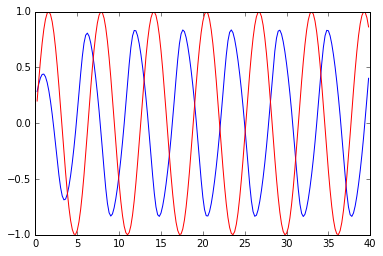

In [146]:
x = np.arange(0.2, 40, step = 0.2)
pred = np.array(generate(sess, len(x)))
true = np.sin(x)
print(x.shape, y.shape)
plt.plot(x, pred, 'b-')
plt.plot(x, true, 'r-')
plt.show()